In [41]:
import pandas as pd
import numpy as np
import os
import shutil
from Bio import PDB
from Bio.SeqUtils import seq1
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

In [42]:
results = pd.read_csv("MD_results_all.csv")

READ IN MD 20% AVERAGES AND TIMESERIES

In [43]:
FOLDER_PROD = "LM_MD_data"
STRUCTURES = results['Structure'].tolist()

# Initialize dictionaries to store the data
rmsd_data = {}
lig_rmsd_data = {}
dist_data = {}

# Read in the continuous data for each structure
for structure in STRUCTURES:
    rmsd_file = f"{FOLDER_PROD}/{structure}/{structure}_0rmsd.dat"
    lig_rmsd_file = f"{FOLDER_PROD}/{structure}/{structure}_0ligand_rmsd.dat"
    dist_file = f"{FOLDER_PROD}/{structure}/{structure}_0ligbasedist.dat"
    
    if os.path.exists(rmsd_file):
        rmsd_data[structure] = np.loadtxt(fname=rmsd_file)
    else:
        print(f"File {rmsd_file} does not exist.")
    
    if os.path.exists(lig_rmsd_file):
        lig_rmsd_data[structure] = np.loadtxt(fname=lig_rmsd_file)
    else:
        print(f"File {lig_rmsd_file} does not exist.")
    
    if os.path.exists(dist_file):
        dist_data[structure] = np.loadtxt(fname=dist_file)
    else:
        print(f"File {dist_file} does not exist.")

BEST AND WORST APO-HOLO RMSDS

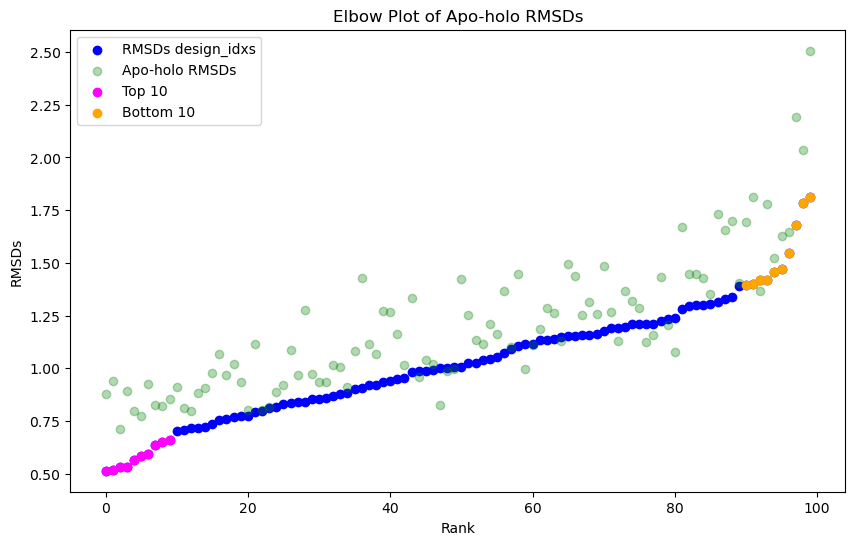

Best Structures:
                                       Structure  Avg RMSD  Avg ligand RMSD  \
88   0.814_1ohp_Rosetta_1ohp_Rosetta_Design_7935  1.687626         1.051401   
63   0.834_1ohp_Rosetta_1ohp_Rosetta_Design_7091  1.622576         0.829453   
47   0.824_1ohp_Rosetta_1ohp_Rosetta_Design_8167  1.756374         1.522501   
60   0.828_1ohp_Rosetta_1ohp_Rosetta_Design_7018  1.783810         1.058162   
8   0.845_1ohp_Rosetta_1ohp_Rosetta_Design_10000  1.492159         0.986626   
43   0.820_1ohp_Rosetta_1ohp_Rosetta_Design_9867  1.720803         1.060661   
44   0.819_1ohp_Rosetta_1ohp_Rosetta_Design_8501  1.652708         1.058742   
20    0.848_1ohp_Rosetta_1ohp_Rosetta_Relax_8212  1.695656         1.136725   
97   0.837_1ohp_Rosetta_1ohp_Rosetta_Design_9541  1.668100         1.121363   
58   0.819_1ohp_Rosetta_1ohp_Rosetta_Design_7589  1.626799         0.860076   

    Ligand base distance Cat resis  RDF cumsum 4.5  Apo-holo RMSDs  \
88              3.654283       ASP        0

In [44]:
# Sort the DataFrame by "Apo-holo RMSDs design_idxs"
sorted_results = results.sort_values(by="Apo-holo RMSDs design_idxs")

# Create the elbow plot using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sorted_results)), sorted_results["Apo-holo RMSDs design_idxs"].values, label='RMSDs design_idxs', color='blue')

# Overlay the Apo-holo RMSDs with lower alpha
plt.scatter(range(len(sorted_results)), sorted_results["Apo-holo RMSDs"].values, label='Apo-holo RMSDs', color='green', alpha=0.3)

# Highlight the top 10 and bottom 10 structures using their rank
top_10_ranks = range(10)
bottom_10_ranks = range(len(sorted_results) - 10, len(sorted_results))

plt.scatter(top_10_ranks, sorted_results.iloc[:10]["Apo-holo RMSDs design_idxs"], color='magenta', label='Top 10')
plt.scatter(bottom_10_ranks, sorted_results.iloc[-10:]["Apo-holo RMSDs design_idxs"], color='orange', label='Bottom 10')

plt.xlabel('Rank')
plt.ylabel('RMSDs')
plt.title('Elbow Plot of Apo-holo RMSDs')
plt.legend()
plt.show()

# Print the rows of the best and worst structures
best_structures = sorted_results.iloc[:10]
worst_structures = sorted_results.iloc[-10:]

print("Best Structures:")
print(best_structures)

print("\nWorst Structures:")
print(worst_structures)

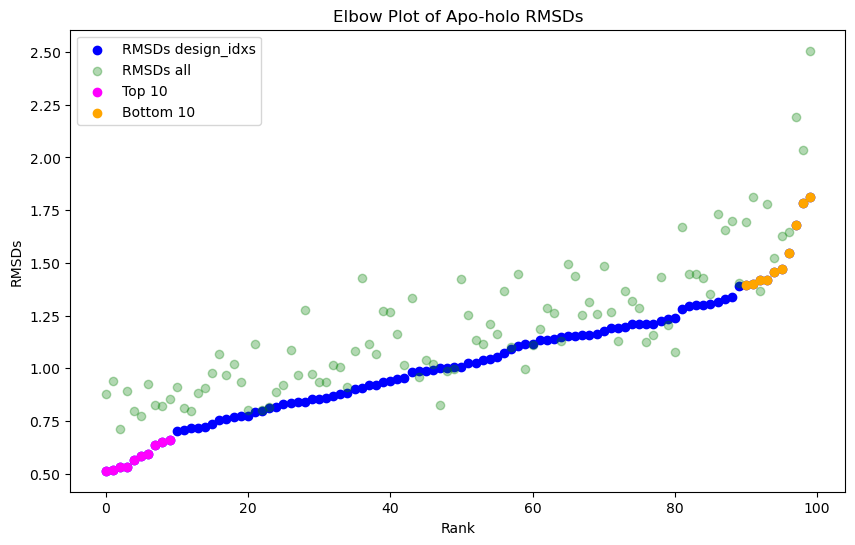

Best Structures:
                                       Structure  Avg RMSD  Avg ligand RMSD  \
88   0.814_1ohp_Rosetta_1ohp_Rosetta_Design_7935  1.687626         1.051401   
63   0.834_1ohp_Rosetta_1ohp_Rosetta_Design_7091  1.622576         0.829453   
47   0.824_1ohp_Rosetta_1ohp_Rosetta_Design_8167  1.756374         1.522501   
60   0.828_1ohp_Rosetta_1ohp_Rosetta_Design_7018  1.783810         1.058162   
8   0.845_1ohp_Rosetta_1ohp_Rosetta_Design_10000  1.492159         0.986626   
43   0.820_1ohp_Rosetta_1ohp_Rosetta_Design_9867  1.720803         1.060661   
44   0.819_1ohp_Rosetta_1ohp_Rosetta_Design_8501  1.652708         1.058742   
20    0.848_1ohp_Rosetta_1ohp_Rosetta_Relax_8212  1.695656         1.136725   
97   0.837_1ohp_Rosetta_1ohp_Rosetta_Design_9541  1.668100         1.121363   
58   0.819_1ohp_Rosetta_1ohp_Rosetta_Design_7589  1.626799         0.860076   

    Ligand base distance Cat resis  RDF cumsum 4.5  Apo-holo RMSDs  \
88              3.654283       ASP        0

In [45]:
# Sort the DataFrame by "Apo-holo RMSDs design_idxs"
sorted_results = results.sort_values(by="Apo-holo RMSDs design_idxs")

# Create the elbow plot using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sorted_results)), sorted_results["Apo-holo RMSDs design_idxs"].values, label='RMSDs design_idxs', color='blue')

# Overlay the Apo-holo RMSDs with lower alpha
plt.scatter(range(len(sorted_results)), sorted_results["Apo-holo RMSDs"].values, label='RMSDs all', color='green', alpha=0.3)

# Highlight the top 10 and bottom 10 structures using their rank
top_10_ranks = range(10)
bottom_10_ranks = range(len(sorted_results) - 10, len(sorted_results))

plt.scatter(top_10_ranks, sorted_results.iloc[:10]["Apo-holo RMSDs design_idxs"], color='magenta', label='Top 10')
plt.scatter(bottom_10_ranks, sorted_results.iloc[-10:]["Apo-holo RMSDs design_idxs"], color='orange', label='Bottom 10')

plt.xlabel('Rank')
plt.ylabel('RMSDs')
plt.title('Elbow Plot of Apo-holo RMSDs')
plt.legend()
plt.show()

# Print the rows of the best and worst structures
best_structures = sorted_results.iloc[:10]
worst_structures = sorted_results.iloc[-10:]

print("Best Structures:")
print(best_structures)

print("\nWorst Structures:")
print(worst_structures)

In [65]:
# Sort the DataFrame by "Average E Field" in descending order
sorted_by_e_field = results.sort_values(by="Average E Field", ascending=False)

# Select the top 5 rows
top_5_e_field_structures = sorted_by_e_field.head(5)

# Print the rows of the top 5 structures
print("Top 5 Structures by Average E Field:")
print(top_5_e_field_structures)

Top 5 Structures by Average E Field:
                                      Structure  Avg RMSD  Avg ligand RMSD  \
50   0.865_1ohp_Rosetta_1ohp_Rosetta_Relax_9724  1.532931         0.828846   
66   0.843_1ohp_Rosetta_1ohp_Rosetta_Relax_7028  1.635288         1.035828   
92   0.848_1ohp_Rosetta_1ohp_Rosetta_Relax_9850  1.572118         0.617214   
36  0.830_1ohp_Rosetta_1ohp_Rosetta_Design_8941  1.579718         1.092002   
17  0.832_1ohp_Rosetta_1ohp_Rosetta_Design_7189  1.780794         0.679191   

    Ligand base distance Cat resis  RDF cumsum 4.5  Apo-holo RMSDs  \
50              3.598593       ASP             0.0        0.977258   
66              3.559498       ASP             0.0        0.883079   
92              3.642310       ASP             0.0        1.654268   
36              3.572206       ASP             0.0        0.886328   
17              3.623177       ASP             0.0        1.698838   

    Apo-holo RMSDs design_idxs  Average E Field  Suffix  
50             

11


,Structure,Avg RMSD,Avg ligand RMSD,Ligand base distance,Cat resis,RDF cumsum 4.5,Apo-holo RMSDs,Apo-holo RMSDs design_idxs,Average E Field,total_score,interface_score,efield_score
6,0.840_1ohp_Rosetta_1ohp_Rosetta_Relax_7078,1.629977,0.994018,3.610330,ASP,0.0,0.969948,0.757749,183.181652,-454.377,-30.421,189.828381
20,0.848_1ohp_Rosetta_1ohp_Rosetta_Relax_8212,1.695656,1.136725,3.590820,ASP,0.0,0.824203,0.635402,177.848260,-466.158,-30.661,184.573767
23,0.810_1ohp_Rosetta_1ohp_Rosetta_Design_7427,1.561827,1.015750,3.616123,ASP,0.0,1.116644,0.793241,175.943515,-456.223,-28.623,184.508719
34,0.859_1ohp_Rosetta_1ohp_Rosetta_Relax_7058,1.625683,0.968263,3.638330,ASP,0.0,0.936947,0.774506,178.169280,-456.159,-31.009,195.078548
35,0.839_1ohp_Rosetta_1ohp_Rosetta_Design_8610,1.692369,0.869266,3.641594,ASP,0.0,0.975426,0.854995,178.562529,-448.924,-30.131,195.233287
36,0.830_1ohp_Rosetta_1ohp_Rosetta_Design_8941,1.579718,1.092002,3.572206,ASP,0.0,0.886328,0.816564,184.105236,-453.649,-30.522,182.907364
43,0.820_1ohp_Rosetta_1ohp_Rosetta_Design_9867,1.720803,1.060661,3.622933,ASP,0.0,0.774687,0.586396,181.280971,-459.638,-28.510,189.603188
50,0.865_1ohp_Rosetta_1ohp_Rosetta_Relax_9724,1.532931,0.828846,3.598593,ASP,0.0,0.977258,0.737066,192.600723,-459.417,-30.599,200.414830
66,0.843_1ohp_Rosetta_1ohp_Rosetta_Relax_7028,1.635288,1.035828,3.559498,ASP,0.0,0.883079,0.719269,189.682700,-456.940,-30.353,190.179558
72,0.834_1ohp_Rosetta_1ohp_Rosetta_Relax_7790,1.912593,0.760202,3.555540,ASP,0.0,0.935228,0.859201,180.920005,-457.370,-29.613,190.564874


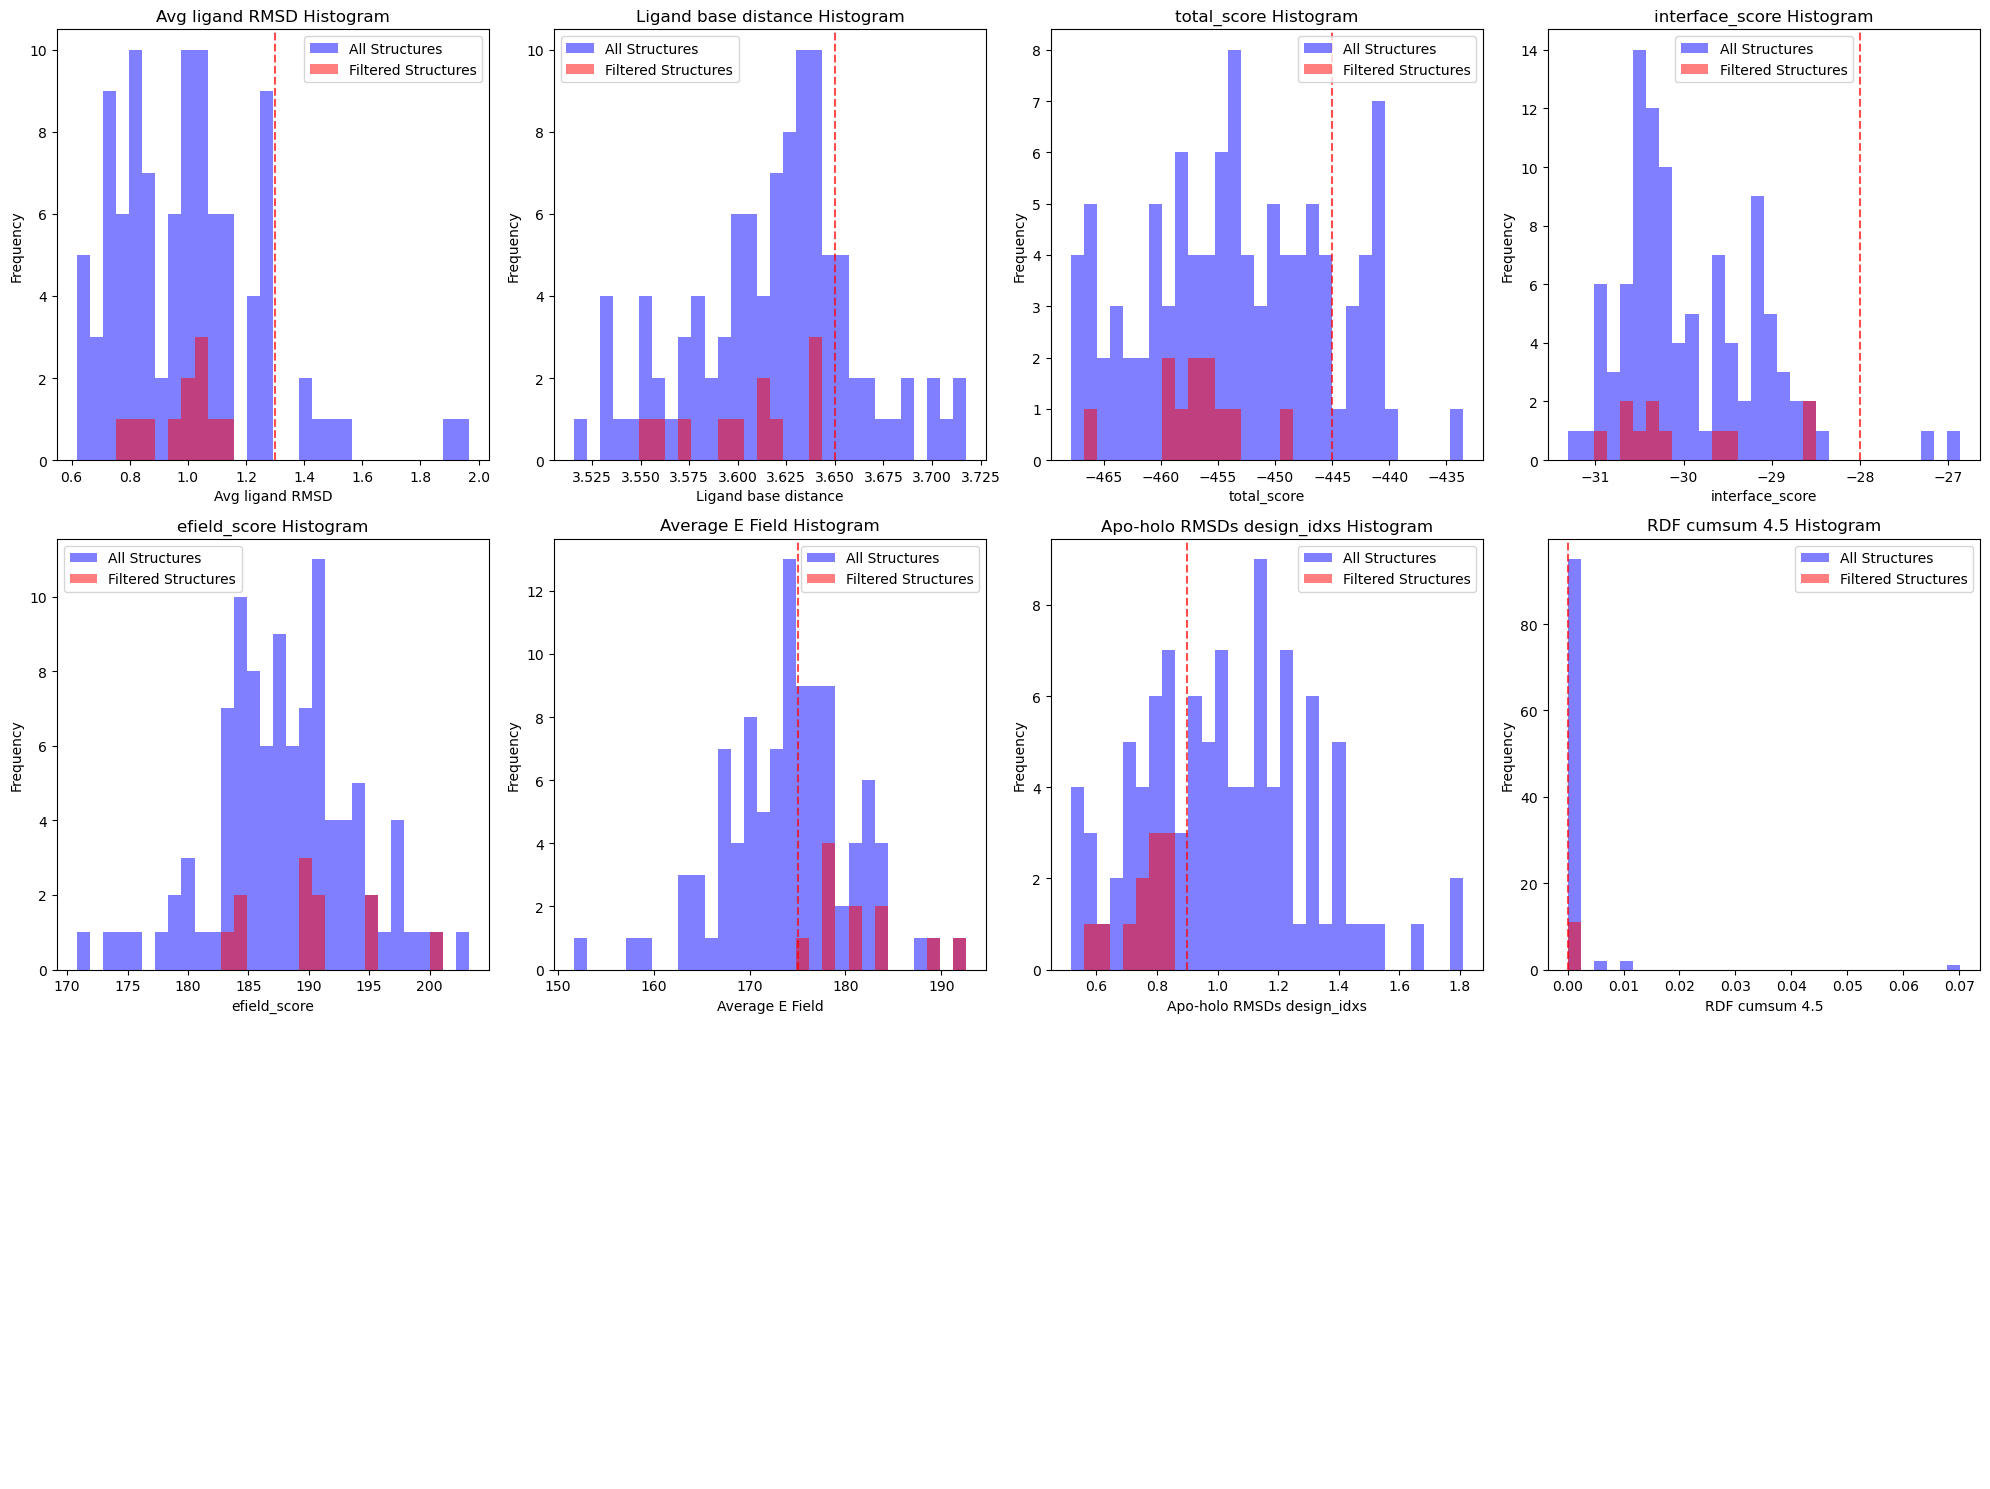

In [105]:
thresholds = {
    "Avg ligand RMSD": 1.3,
    #"Avg RMSD": None,
    "Ligand base distance": 3.65,
    "total_score": -445,
    "interface_score": -28,
    "efield_score": None,
    "Average E Field": 175,
    "Apo-holo RMSDs design_idxs": 0.9,
    "RDF cumsum 4.5": 0.0001
}

# Read in all scores
all_scores = pd.read_csv("all_scores.csv")

# Extract suffix from the Structure column
results.loc[:, 'Suffix'] = results['Structure'].apply(lambda x: int(x.split('_')[-1]))

# Select only the necessary columns from all_scores
all_scores["index"] = all_scores["index"].apply(lambda x: int(x))
selected_scores = all_scores[['index', 'total_score', 'interface_score', 'efield_score']]

# Merge the results with selected_scores on the suffix and index
merged_results = pd.merge(results, selected_scores, left_on='Suffix', right_on='index', how='left')

# Drop the Suffix and index columns as they are no longer needed
merged_results.drop(columns=['Suffix', 'index'], inplace=True)

# Apply the filtering criteria using the thresholds dictionary
filter_conditions = pd.Series([True] * len(merged_results))

for key, value in thresholds.items():
    if value is not None:
        if key in ["efield_score", "Average E Field"]:
            filter_conditions &= (merged_results[key] > value)
        else:
            filter_conditions &= (merged_results[key] < value)

filtered_results = merged_results[filter_conditions]

# Display the updated filtered results
print(len(filtered_results))
display(filtered_results)

# Plot histograms for each metric with the cutoff indicated
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, (key, value) in enumerate(thresholds.items()):
    if key in merged_results.columns:
        # Plot histogram for all structures
        n, bins, patches = axes[i].hist(merged_results[key], bins=30, color='blue', alpha=0.5, label='All Structures')
        
        # Plot histogram for filtered structures
        axes[i].hist(filtered_results[key], bins=bins, color='red', alpha=0.5, label='Filtered Structures')
        
        # Plot the threshold line if the value is not None
        if value is not None:
            axes[i].axvline(x=value, color='red', linestyle='--', alpha=0.7)
        
        # Set title and labels
        axes[i].set_title(f'{key} Histogram')
        axes[i].set_xlabel(key)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

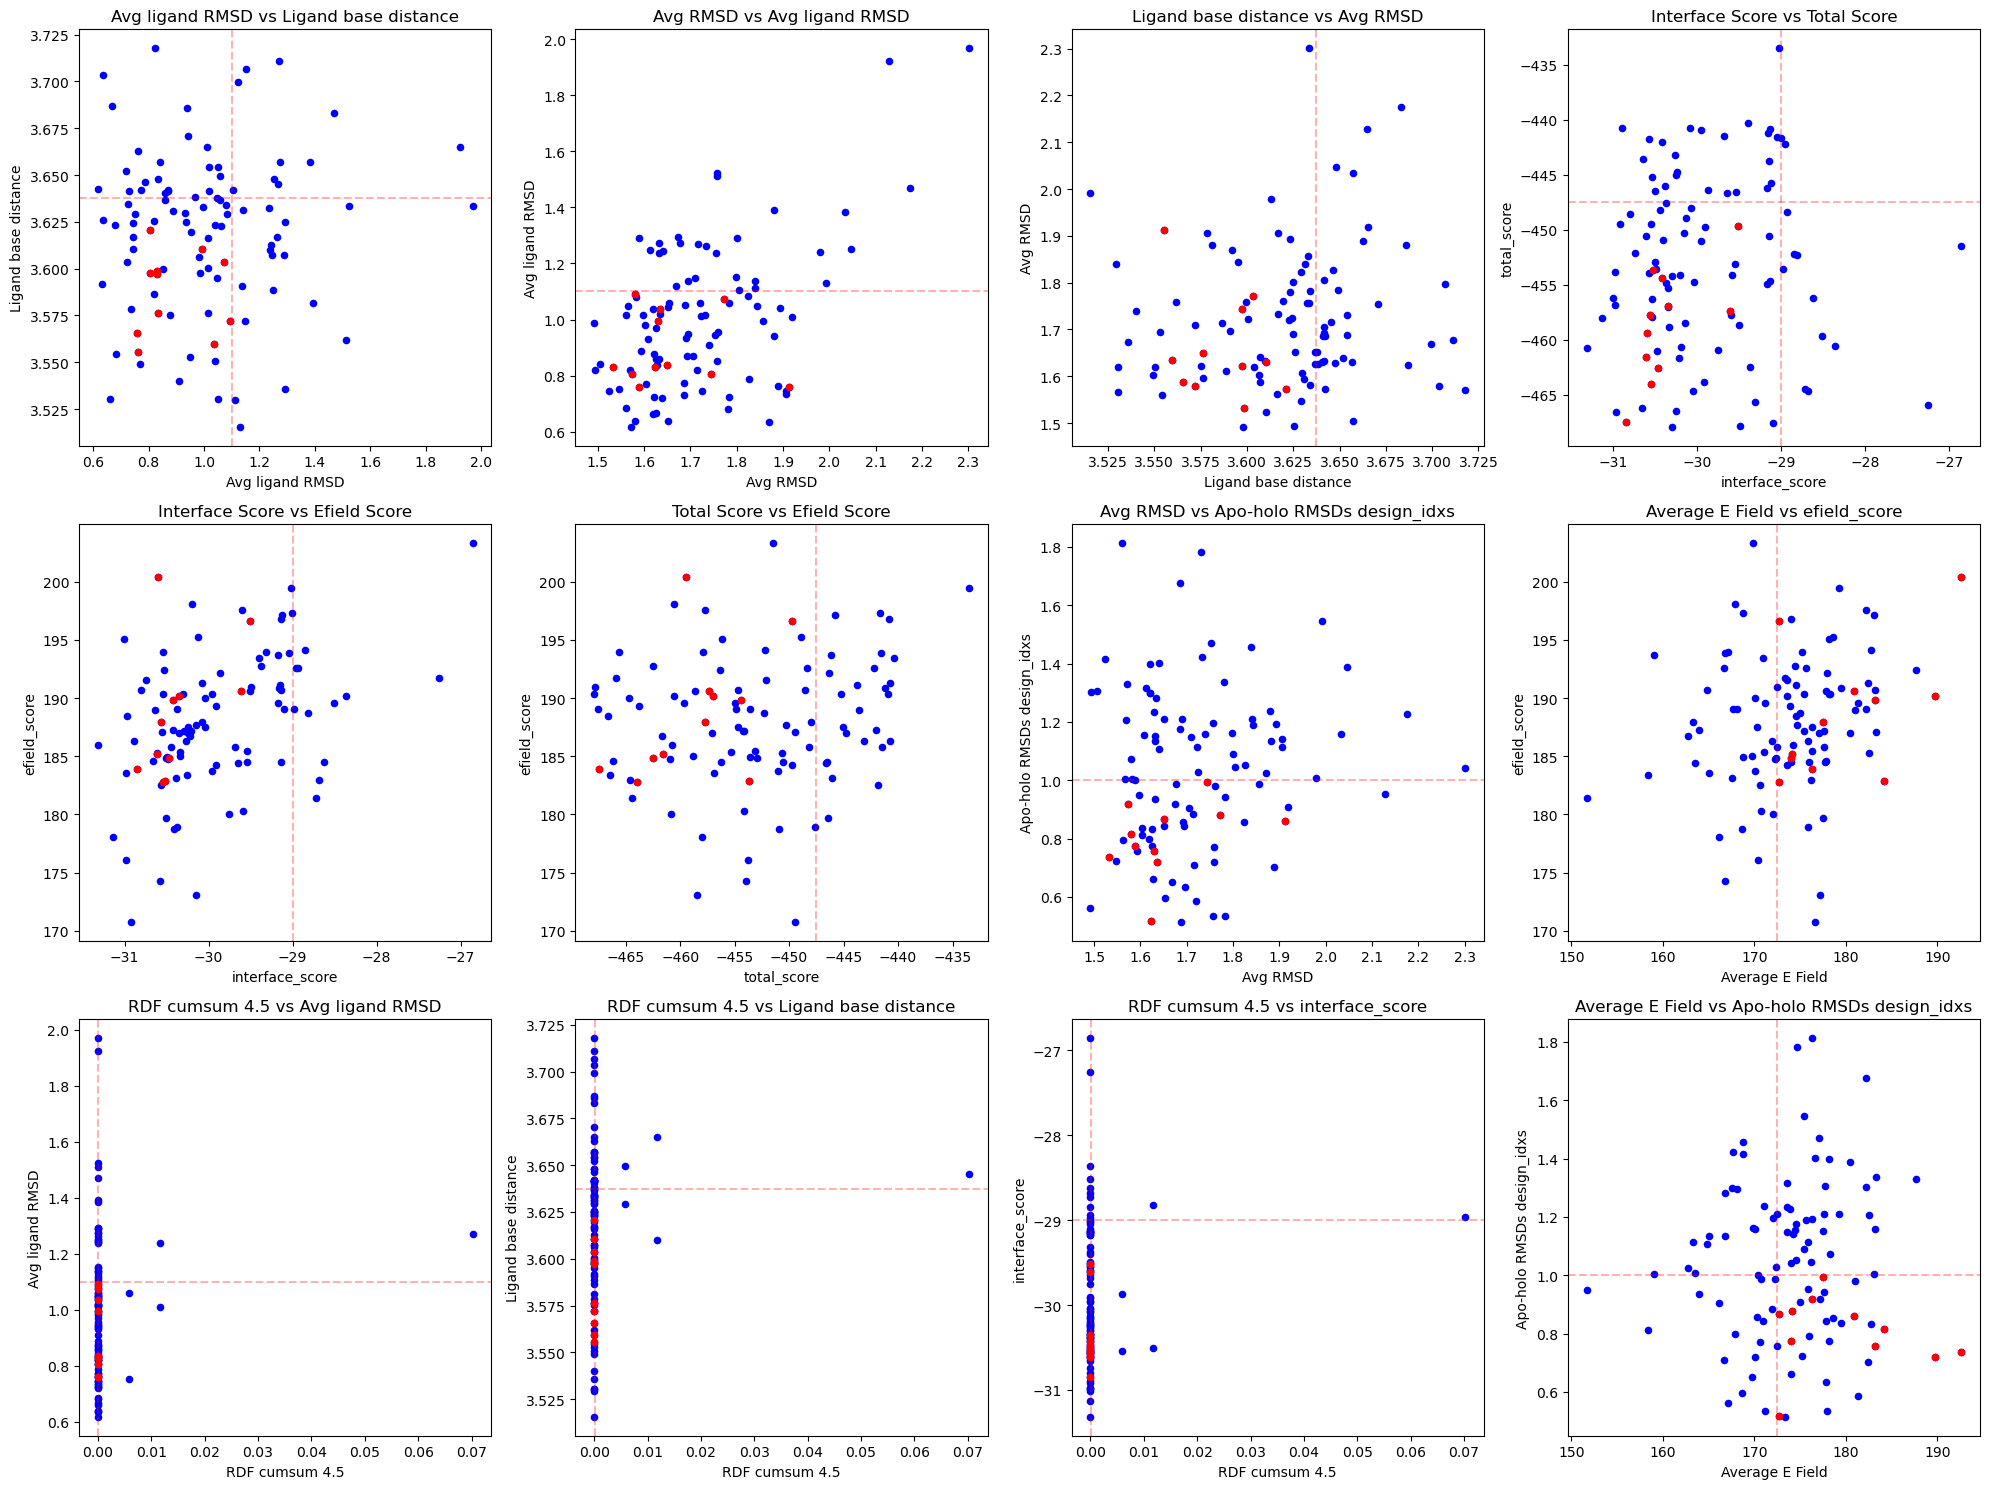

In [85]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Existing scatter plots
merged_results.plot.scatter(x="Avg ligand RMSD", y="Ligand base distance", color='b', title="Avg ligand RMSD vs Ligand base distance", ax=axes[0, 0])
filtered_results.plot.scatter(x="Avg ligand RMSD", y="Ligand base distance", ax=axes[0, 0], color='r')
if thresholds.get("Ligand base distance") is not None:
    axes[0, 0].axhline(y=thresholds["Ligand base distance"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("Avg ligand RMSD") is not None:
    axes[0, 0].axvline(x=thresholds["Avg ligand RMSD"], color='red', linestyle='--', alpha=0.3)

merged_results.plot.scatter(x="Avg RMSD", y="Avg ligand RMSD", color='b', title="Avg RMSD vs Avg ligand RMSD", ax=axes[0, 1])
filtered_results.plot.scatter(x="Avg RMSD", y="Avg ligand RMSD", ax=axes[0, 1], color='r')
if thresholds.get("Avg ligand RMSD") is not None:
    axes[0, 1].axhline(y=thresholds["Avg ligand RMSD"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("Avg RMSD") is not None:
    axes[0, 1].axvline(x=thresholds["Avg RMSD"], color='red', linestyle='--', alpha=0.3)

merged_results.plot.scatter(x="Ligand base distance", y="Avg RMSD", color='b', title="Ligand base distance vs Avg RMSD", ax=axes[0, 2])
filtered_results.plot.scatter(x="Ligand base distance", y="Avg RMSD", ax=axes[0, 2], color='r')
if thresholds.get("Avg RMSD") is not None:
    axes[0, 2].axhline(y=thresholds["Avg RMSD"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("Ligand base distance") is not None:
    axes[0, 2].axvline(x=thresholds["Ligand base distance"], color='red', linestyle='--', alpha=0.3)

merged_results.plot.scatter(x="interface_score", y="total_score", color='b', title="Interface Score vs Total Score", ax=axes[0, 3])
filtered_results.plot.scatter(x="interface_score", y="total_score", ax=axes[0, 3], color='r')
if thresholds.get("total_score") is not None:
    axes[0, 3].axhline(y=thresholds["total_score"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("interface_score") is not None:
    axes[0, 3].axvline(x=thresholds["interface_score"], color='red', linestyle='--', alpha=0.3)

merged_results.plot.scatter(x="interface_score", y="efield_score", color='b', title="Interface Score vs Efield Score", ax=axes[1, 0])
filtered_results.plot.scatter(x="interface_score", y="efield_score", ax=axes[1, 0], color='r')
if thresholds.get("efield_score") is not None:
    axes[1, 0].axhline(y=thresholds["efield_score"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("interface_score") is not None:
    axes[1, 0].axvline(x=thresholds["interface_score"], color='red', linestyle='--', alpha=0.3)

merged_results.plot.scatter(x="total_score", y="efield_score", color='b', title="Total Score vs Efield Score", ax=axes[1, 1])
filtered_results.plot.scatter(x="total_score", y="efield_score", ax=axes[1, 1], color='r')
if thresholds.get("efield_score") is not None:
    axes[1, 1].axhline(y=thresholds["efield_score"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("total_score") is not None:
    axes[1, 1].axvline(x=thresholds["total_score"], color='red', linestyle='--', alpha=0.3)

# New scatter plots
merged_results.plot.scatter(x="Avg RMSD", y="Apo-holo RMSDs design_idxs", color='b', title="Avg RMSD vs Apo-holo RMSDs design_idxs", ax=axes[1, 2])
filtered_results.plot.scatter(x="Avg RMSD", y="Apo-holo RMSDs design_idxs", ax=axes[1, 2], color='r')
if thresholds.get("Apo-holo RMSDs design_idxs") is not None:
    axes[1, 2].axhline(y=thresholds["Apo-holo RMSDs design_idxs"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("Avg RMSD") is not None:
    axes[1, 2].axvline(x=thresholds["Avg RMSD"], color='red', linestyle='--', alpha=0.3)

merged_results.plot.scatter(x="Average E Field", y="efield_score", color='b', title="Average E Field vs efield_score", ax=axes[1, 3])
filtered_results.plot.scatter(x="Average E Field", y="efield_score", ax=axes[1, 3], color='r')
if thresholds.get("efield_score") is not None:
    axes[1, 3].axhline(y=thresholds["efield_score"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("Average E Field") is not None:
    axes[1, 3].axvline(x=thresholds["Average E Field"], color='red', linestyle='--', alpha=0.3)

merged_results.plot.scatter(x="RDF cumsum 4.5", y="Avg ligand RMSD", color='b', title="RDF cumsum 4.5 vs Avg ligand RMSD", ax=axes[2, 0])
filtered_results.plot.scatter(x="RDF cumsum 4.5", y="Avg ligand RMSD", ax=axes[2, 0], color='r')
if thresholds.get("Avg ligand RMSD") is not None:
    axes[2, 0].axhline(y=thresholds["Avg ligand RMSD"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("RDF cumsum 4.5") is not None:
    axes[2, 0].axvline(x=thresholds["RDF cumsum 4.5"], color='red', linestyle='--', alpha=0.3)

merged_results.plot.scatter(x="RDF cumsum 4.5", y="Ligand base distance", color='b', title="RDF cumsum 4.5 vs Ligand base distance", ax=axes[2, 1])
filtered_results.plot.scatter(x="RDF cumsum 4.5", y="Ligand base distance", ax=axes[2, 1], color='r')
if thresholds.get("Ligand base distance") is not None:
    axes[2, 1].axhline(y=thresholds["Ligand base distance"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("RDF cumsum 4.5") is not None:
    axes[2, 1].axvline(x=thresholds["RDF cumsum 4.5"], color='red', linestyle='--', alpha=0.3)

merged_results.plot.scatter(x="RDF cumsum 4.5", y="interface_score", color='b', title="RDF cumsum 4.5 vs interface_score", ax=axes[2, 2])
filtered_results.plot.scatter(x="RDF cumsum 4.5", y="interface_score", ax=axes[2, 2], color='r')
if thresholds.get("interface_score") is not None:
    axes[2, 2].axhline(y=thresholds["interface_score"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("RDF cumsum 4.5") is not None:
    axes[2, 2].axvline(x=thresholds["RDF cumsum 4.5"], color='red', linestyle='--', alpha=0.3)

merged_results.plot.scatter(x="Average E Field", y = "Apo-holo RMSDs design_idxs", color='b', title="Average E Field vs Apo-holo RMSDs design_idxs", ax=axes[2, 3])
filtered_results.plot.scatter(x="Average E Field", y = "Apo-holo RMSDs design_idxs", ax=axes[2, 3], color='r')
if thresholds.get("Apo-holo RMSDs design_idxs") is not None:
    axes[2, 3].axhline(y=thresholds["Apo-holo RMSDs design_idxs"], color='red', linestyle='--', alpha=0.3)
if thresholds.get("Average E Field") is not None:
    axes[2, 3].axvline(x=thresholds["Average E Field"], color='red', linestyle='--', alpha=0.3)

# Hide the last subplot (axes[2, 3]) if not used
#axes[2, 3].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Define the folder containing the MD simulation data
FOLDER_PROD = "LM_MD_data"

# Get the list of structures from the results DataFrame
STRUCTURES = results['Structure'].tolist()

# Initialize dictionaries to store the data
rmsd_data = {}
lig_rmsd_data = {}
dist_data = {}

# Read in the continuous data for each structure
for structure in STRUCTURES:
    rmsd_file = f"{FOLDER_PROD}/{structure}/{structure}_0rmsd.dat"
    lig_rmsd_file = f"{FOLDER_PROD}/{structure}/{structure}_0ligand_rmsd.dat"
    dist_file = f"{FOLDER_PROD}/{structure}/{structure}_0ligbasedist.dat"
    
    if os.path.exists(rmsd_file):
        rmsd_data[structure] = np.loadtxt(fname=rmsd_file)
    else:
        print(f"File {rmsd_file} does not exist.")
    
    if os.path.exists(lig_rmsd_file):
        lig_rmsd_data[structure] = np.loadtxt(fname=lig_rmsd_file)
    else:
        print(f"File {lig_rmsd_file} does not exist.")
    
    if os.path.exists(dist_file):
        dist_data[structure] = np.loadtxt(fname=dist_file)
    else:
        print(f"File {dist_file} does not exist.")

# Calculate the mean ligand RMSD and distance to base for the last nanosecond
last_ns_mean_lig_rmsd = {structure: np.mean(lig_rmsd_data[structure][-10:]) for structure in STRUCTURES if structure in lig_rmsd_data}
last_ns_mean_dist = {structure: np.mean(dist_data[structure][-10:]) for structure in STRUCTURES if structure in dist_data}

# Normalize the scores
scaler = MinMaxScaler()
normalized_lig_rmsd = scaler.fit_transform(np.array(list(last_ns_mean_lig_rmsd.values())).reshape(-1, 1)).flatten()
normalized_dist = scaler.fit_transform(np.array(list(last_ns_mean_dist.values())).reshape(-1, 1)).flatten()

# Combine the scores
combined_scores = {structure: normalized_lig_rmsd[i] + normalized_dist[i] for i, structure in enumerate(last_ns_mean_lig_rmsd.keys())}

# Select the 10 best and 10 worst structures based on the combined score
sorted_structures = sorted(combined_scores, key=combined_scores.get)
best_structures = sorted_structures[:10]
worst_structures = sorted_structures[-10:]

# Combine best and worst structures
selected_structures = best_structures + worst_structures

# Calculate global min and max for each metric
all_rmsd = np.concatenate([rmsd_data[structure] for structure in selected_structures if structure in rmsd_data])
all_lig_rmsd = np.concatenate([lig_rmsd_data[structure] for structure in selected_structures if structure in lig_rmsd_data])
all_dist = np.concatenate([dist_data[structure] for structure in selected_structures if structure in dist_data])

rmsd_min, rmsd_max = all_rmsd.min(), all_rmsd.max()
lig_rmsd_min, lig_rmsd_max = all_lig_rmsd.min(), all_lig_rmsd.max()
dist_min, dist_max = all_dist.min(), all_dist.max()

# Create a figure with 20 rows and 3 columns
fig, axes = plt.subplots(nrows=21, ncols=3, figsize=(15, 21 * 3))

# Loop through each selected structure and plot the data
for i, structure in enumerate(selected_structures):
    # Get the data
    rmsd = rmsd_data.get(structure, [])
    lig_rmsd = lig_rmsd_data.get(structure, [])
    dist = dist_data.get(structure, [])
    
    # Define the timescale (assuming 10 ns total)
    timescale = np.linspace(0, 10, len(rmsd))
    
    # Plot RMSD
    axes[i if i < 10 else i + 1, 0].plot(timescale, rmsd, color='b')
    axes[i if i < 10 else i + 1, 0].set_title(f"{structure.split('_')[-1]} - RMSD")
    axes[i if i < 10 else i + 1, 0].set_xlabel("Time (ns)")
    axes[i if i < 10 else i + 1, 0].set_ylabel("RMSD (Å)")
    axes[i if i < 10 else i + 1, 0].set_ylim(rmsd_min, rmsd_max)
    
    # Plot Ligand RMSD
    axes[i if i < 10 else i + 1, 1].plot(timescale, lig_rmsd, color='r')
    axes[i if i < 10 else i + 1, 1].set_title(f"{structure.split('_')[-1]} - Ligand RMSD")
    axes[i if i < 10 else i + 1, 1].set_xlabel("Time (ns)")
    axes[i if i < 10 else i + 1, 1].set_ylabel("Ligand RMSD (Å)")
    axes[i if i < 10 else i + 1, 1].set_ylim(lig_rmsd_min, lig_rmsd_max)
    
    # Plot Distance to Base
    axes[i if i < 10 else i + 1, 2].plot(timescale, dist, color='purple')
    axes[i if i < 10 else i + 1, 2].set_title(f"{structure.split('_')[-1]} - Distance to Base")
    axes[i if i < 10 else i + 1, 2].set_xlabel("Time (ns)")
    axes[i if i < 10 else i + 1, 2].set_ylabel("Distance (Å)")
    axes[i if i < 10 else i + 1, 2].set_ylim(dist_min, dist_max)

# Add a title to separate best and worst structures
axes[10, 0].set_title("Worst Structures", fontsize=16, color='red')
axes[10, 1].set_title("Worst Structures", fontsize=16, color='red')
axes[10, 2].set_title("Worst Structures", fontsize=16, color='red')

# Adjust layout
plt.tight_layout()
plt.show()

In [106]:
# Define source and destination directories
source_dir = "MD_structures_PMPNN"
dest_dir = "best_structures"

# Clear the destination directory
if os.path.exists(dest_dir):
    shutil.rmtree(dest_dir)
os.makedirs(dest_dir)

# Copy the filtered structures
for structure in filtered_results["Structure"]:
    src_file = os.path.join(source_dir, f"{structure}.pdb")
    dest_file = os.path.join(dest_dir, f"{structure}.pdb")
    if os.path.exists(src_file):
        shutil.copy(src_file, dest_file)
    else:
        print(f"File {src_file} does not exist.")

In [107]:
import os
from Bio import PDB
from collections import Counter, defaultdict

source_dir = "MD_structures_PMPNN"
dest_dir = "best_structures"

# Function to extract sequence from a PDB file
def extract_sequence(pdb_file):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('X', pdb_file)
    sequence = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if PDB.is_aa(residue):
                    sequence.append(residue.resname)
    return sequence

# Function to compute consensus sequence
def compute_consensus(sequences):
    consensus = []
    for i in range(len(sequences[0])):
        column = [seq[i] for seq in sequences]
        most_common = Counter(column).most_common(1)[0][0]
        consensus.append(most_common)
    return consensus

# Function to find differences from consensus with filtering
def find_differences(sequence, consensus, filter_positions, highlight_positions):
    differences = []
    for i, (res, cons_res) in enumerate(zip(sequence, consensus)):
        if res != cons_res and i + 1 in filter_positions:
            highlight = i + 1 in highlight_positions
            differences.append((i + 1, res, highlight))
    return differences

# Define the positions to filter
filter_positions = {7, 10, 11, 14, 15, 18, 26, 29, 30, 38, 54, 55, 58, 59, 63, 65, 71, 73, 78, 80, 82, 84, 86, 93, 95, 97, 99, 101, 103, 109, 112, 114, 116, 121}

# Define the positions to highlight
highlight_positions = {65, 18, 26, 101, 14, 80, 82, 84, 112, 114, 97, 58, 55, 116, 95}

# Extract sequences from PDB files
sequences = []
for structure in filtered_results["Structure"]:
    pdb_file = os.path.join(source_dir, f"{structure}.pdb")
    if os.path.exists(pdb_file):
        sequence = extract_sequence(pdb_file)
        sequences.append(sequence)
    else:
        print(f"File {pdb_file} does not exist.")

# Compute consensus sequence
consensus_sequence = compute_consensus(sequences)
print("Consensus Sequence:", consensus_sequence)

# Find differences for each structure with filtering
differences_dict = defaultdict(list)
for structure, sequence in zip(filtered_results["Structure"], sequences):
    differences = find_differences(sequence, consensus_sequence, filter_positions, highlight_positions)
    differences_dict[structure] = differences

# Print differences
for structure, differences in differences_dict.items():
    print(f"Differences for {structure}:")
    for pos, res, highlight in differences:
        if highlight:
            print(f"Position {pos}: {res} (AS)")
        else:
            print(f"Position {pos}: {res}")



Consensus Sequence: ['MET', 'LEU', 'THR', 'LYS', 'GLU', 'GLU', 'ILE', 'THR', 'ALA', 'LEU', 'VAL', 'GLU', 'ARG', 'TYR', 'LEU', 'ALA', 'ALA', 'LEU', 'ASN', 'ALA', 'LYS', 'ASP', 'LEU', 'ASP', 'GLY', 'LEU', 'VAL', 'ALA', 'MET', 'PHE', 'ALA', 'PRO', 'ASP', 'ALA', 'VAL', 'LEU', 'GLU', 'ILE', 'PRO', 'VAL', 'GLY', 'SER', 'GLU', 'PRO', 'ARG', 'VAL', 'GLY', 'ARG', 'GLU', 'ALA', 'ILE', 'ARG', 'ALA', 'TRP', 'TYR', 'GLU', 'GLU', 'TRP', 'LEU', 'LYS', 'VAL', 'ASP', 'PHE', 'THR', 'ILE', 'THR', 'LEU', 'LEU', 'ASN', 'PRO', 'PHE', 'ASP', 'ILE', 'ASP', 'GLY', 'ASN', 'THR', 'VAL', 'THR', 'PHE', 'ASP', 'VAL', 'GLU', 'VAL', 'THR', 'PHE', 'THR', 'LYS', 'ASP', 'GLY', 'LYS', 'LYS', 'PHE', 'SER', 'TYR', 'LYS', 'SER', 'THR', 'ASP', 'THR', 'ILE', 'GLU', 'TRP', 'ASN', 'ASP', 'GLU', 'GLY', 'LYS', 'ILE', 'LYS', 'ARG', 'LEU', 'THR', 'VAL', 'GLU', 'TYR', 'ASP', 'LEU', 'SER', 'THR', 'TRP', 'LYS', 'VAL', 'LEU', 'GLU']
Differences for 0.840_1ohp_Rosetta_1ohp_Rosetta_Relax_7078:
Position 112: VAL (AS)
Differences for 0.848